In [77]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
#from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
#from matplotlib.patches import Ellipse
from matplotlib.cm import ScalarMappable
#from matplotlib.patheffects import withStroke
#import matplotlib.ticker as ticker

#import math
#import csv
#from math import pi
#import pandas as pd
#import glob
#import match 

#import seaborn as sns
#import statistics as stat

#from scipy.stats import kde #for the plot very soft
#from scipy.stats import gaussian_kde
#from sklearn.neighbors import KernelDensity

from astropy.io import fits
from astropy.table import Table, unique, join, vstack, QTable, hstack
#from astropy.visualization import astropy_mpl_style
#from astropy.visualization import simple_norm
#from astropy.visualization import make_lupton_rgb
#from astropy.visualization import SqrtStretch
#from astropy.visualization import ZScaleInterval


from astropy.stats import biweight_location, biweight_scale
#from astropy.nddata import Cutout2D
from astropy import units as u
from astropy import constants as Cons
from astropy.wcs import WCS
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9
from astropy.cosmology import LambdaCDM
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import SkyCoord, Galactic, Angle

#
#plt.rcParams['text.usetex'] = True
#plt.rcParams['xtick.direction'] = 'in'
#plt.rcParams['ytick.direction'] = 'in'
#
#plt.rcParams['axes.linewidth'] = 1.5
#plt.rcParams['xtick.major.size'] = 6
#plt.rcParams['xtick.minor.size'] = 3
#plt.rcParams['ytick.major.size'] = 6
#plt.rcParams['ytick.minor.size'] = 3

In [78]:
names = [
    'extension', 'chip', 'X', 'Y', 'chi', 'SN', 'obj_sharpness', 'obj_roundness', 'd_Maxis', 'crowding', 
    'obj_type', 'counts_ACS_F606W', 'SkyLvl_ACS_F606W', 'norm_count_rate_ACS_F606W', 'norm_count_rate_uncert_ACS_F606W', 
    'VEGAMAG_ACS_F606W', 'UBVRI_ACS_F606W', 'mag_uncert_ACS_F606W', 'chi_ACS_F606W', 'SN_ACS_F606W', 
    'sharpness_ACS_F606W', 'roundness_ACS_F606W', 'crowding_ACS_F606W', 'phot_quality_flag_ACS_F606W', 
    'counts_ACS_F814W', 'SkyLvl_ACS_F814W', 'norm_count_rate_ACS_F814W', 'norm_count_rate_uncert_ACS_F814W', 
    'VEGAMAG_ACS_F814W', 'UBVRI_ACS_F814W', 'mag_uncert_ACS_F814W', 'chi_ACS_F814W', 'SN_ACS_F814W', 
    'sharpness_ACS_F814W', 'roundness_ACS_F814W', 'crowding_ACS_F814W', 'phot_quality_flag_ACS_F814W', 
    'counts_F606W_j9ec41afq_flc_chip1', 'SkyLvl_F606W_j9ec41afq_flc_chip1', 'norm_count_rate_F606W_j9ec41afq_flc_chip1', 
    'norm_count_rate_uncert_F606W_j9ec41afq_flc_chip1', 'VEGAMAG_F606W_j9ec41afq_flc_chip1', 'UBVRI_F606W_j9ec41afq_flc_chip1', 
    'mag_uncert_F606W_j9ec41afq_flc_chip1', 'chi_F606W_j9ec41afq_flc_chip1', 'SN_F606W_j9ec41afq_flc_chip1', 
    'sharpness_F606W_j9ec41afq_flc_chip1', 'roundness_F606W_j9ec41afq_flc_chip1', 'crowding_F606W_j9ec41afq_flc_chip1', 
    'phot_quality_flag_F606W_j9ec41afq_flc_chip1', 'counts_F606W_j9ec41afq_flc_chip2', 'SkyLvl_F606W_j9ec41afq_flc_chip2', 
    'norm_count_rate_F606W_j9ec41afq_flc_chip2', 'norm_count_rate_uncert_F606W_j9ec41afq_flc_chip2', 'VEGAMAG_F606W_j9ec41afq_flc_chip2', 
    'UBVRI_F606W_j9ec41afq_flc_chip2', 'mag_uncert_F606W_j9ec41afq_flc_chip2', 'chi_F606W_j9ec41afq_flc_chip2', 
    'SN_F606W_j9ec41afq_flc_chip2', 'sharpness_F606W_j9ec41afq_flc_chip2', 'roundness_F606W_j9ec41afq_flc_chip2', 
    'crowding_F606W_j9ec41afq_flc_chip2', 'phot_quality_flag_F606W_j9ec41afq_flc_chip2', 'counts_F606W_j9ec41agq_flc_chip1', 
    'SkyLvl_F606W_j9ec41agq_flc_chip1', 'norm_count_rate_F606W_j9ec41agq_flc_chip1', 'norm_count_rate_uncert_F606W_j9ec41agq_flc_chip1', 
    'VEGAMAG_F606W_j9ec41agq_flc_chip1', 'UBVRI_F606W_j9ec41agq_flc_chip1', 'mag_uncert_F606W_j9ec41agq_flc_chip1', 
    'chi_F606W_j9ec41agq_flc_chip1', 'SN_F606W_j9ec41agq_flc_chip1', 'sharpness_F606W_j9ec41agq_flc_chip1', 
    'roundness_F606W_j9ec41agq_flc_chip1', 'crowding_F606W_j9ec41agq_flc_chip1', 'phot_quality_flag_F606W_j9ec41agq_flc_chip1', 
    'counts_F606W_j9ec41agq_flc_chip2', 'SkyLvl_F606W_j9ec41agq_flc_chip2', 'norm_count_rate_F606W_j9ec41agq_flc_chip2', 
    'norm_count_rate_uncert_F606W_j9ec41agq_flc_chip2', 'VEGAMAG_F606W_j9ec41agq_flc_chip2', 'UBVRI_F606W_j9ec41agq_flc_chip2', 
    'mag_uncert_F606W_j9ec41agq_flc_chip2', 'chi_F606W_j9ec41agq_flc_chip2', 'SN_F606W_j9ec41agq_flc_chip2', 
    'sharpness_F606W_j9ec41agq_flc_chip2', 'roundness_F606W_j9ec41agq_flc_chip2', 'crowding_F606W_j9ec41agq_flc_chip2', 
    'phot_quality_flag_F606W_j9ec41agq_flc_chip2', 'counts_F814W_j9ec41aiq_flc_chip1', 'SkyLvl_F814W_j9ec41aiq_flc_chip1', 
    'norm_count_rate_F814W_j9ec41aiq_flc_chip1', 'norm_count_rate_uncert_F814W_j9ec41aiq_flc_chip1', 'VEGAMAG_F814W_j9ec41aiq_flc_chip1', 
    'UBVRI_F814W_j9ec41aiq_flc_chip1', 'mag_uncert_F814W_j9ec41aiq_flc_chip1', 'chi_F814W_j9ec41aiq_flc_chip1', 
    'SN_F814W_j9ec41aiq_flc_chip1', 'sharpness_F814W_j9ec41aiq_flc_chip1', 'roundness_F814W_j9ec41aiq_flc_chip1', 
    'crowding_F814W_j9ec41aiq_flc_chip1', 'phot_quality_flag_F814W_j9ec41aiq_flc_chip1', 'counts_F814W_j9ec41aiq_flc_chip2', 
    'SkyLvl_F814W_j9ec41aiq_flc_chip2', 'norm_count_rate_F814W_j9ec41aiq_flc_chip2', 'norm_count_rate_uncert_F814W_j9ec41aiq_flc_chip2', 
    'VEGAMAG_F814W_j9ec41aiq_flc_chip2', 'UBVRI_F814W_j9ec41aiq_flc_chip2', 'mag_uncert_F814W_j9ec41aiq_flc_chip2', 
    'chi_F814W_j9ec41aiq_flc_chip2', 'SN_F814W_j9ec41aiq_flc_chip2', 'sharpness_F814W_j9ec41aiq_flc_chip2', 
    'roundness_F814W_j9ec41aiq_flc_chip2', 'crowding_F814W_j9ec41aiq_flc_chip2', 'phot_quality_flag_F814W_j9ec41aiq_flc_chip2', 
    'counts_F814W_j9ec41akq_flc_chip1', 'SkyLvl_F814W_j9ec41akq_flc_chip1', 'norm_count_rate_F814W_j9ec41akq_flc_chip1', 
    'norm_count_rate_uncert_F814W_j9ec41akq_flc_chip1', 'VEGAMAG_F814W_j9ec41akq_flc_chip1', 'UBVRI_F814W_j9ec41akq_flc_chip1', 
    'mag_uncert_F814W_j9ec41akq_flc_chip1', 'chi_F814W_j9ec41akq_flc_chip1', 'SN_F814W_j9ec41akq_flc_chip1', 
    'sharpness_F814W_j9ec41akq_flc_chip1', 'roundness_F814W_j9ec41akq_flc_chip1', 'crowding_F814W_j9ec41akq_flc_chip1', 
    'phot_quality_flag_F814W_j9ec41akq_flc_chip1', 'counts_F814W_j9ec41akq_flc_chip2', 'SkyLvl_F814W_j9ec41akq_flc_chip2', 
    'norm_count_rate_F814W_j9ec41akq_flc_chip2', 'norm_count_rate_uncert_F814W_j9ec41akq_flc_chip2', 'VEGAMAG_F814W_j9ec41akq_flc_chip2', 
    'UBVRI_F814W_j9ec41akq_flc_chip2', 'mag_uncert_F814W_j9ec41akq_flc_chip2', 'chi_F814W_j9ec41akq_flc_chip2', 
    'SN_F814W_j9ec41akq_flc_chip2', 'sharpness_F814W_j9ec41akq_flc_chip2', 'roundness_F814W_j9ec41akq_flc_chip2', 
    'crowding_F814W_j9ec41akq_flc_chip2', 'phot_quality_flag_F814W_j9ec41akq_flc_chip2'
]

In [94]:
filename = 'data_fits/hlsp_angst_hst_acs-wfc_10523-ngc3031-halo-1_f814w_v1_ref.fits'

In [99]:
#t = Table.read(filename, format='fits')
#hdu = fits.open(filename)

t = np.loadtxt(filename)
t.shape #casi 41,963 fuentes con 141 columnas cada una
T = Table(t)
T.rename_columns(T.colnames,names)

#### Culls
##### Radburn-Smith et al. 2011

In [100]:
T = T[T['obj_type']==1]
T = T[T['crowding_ACS_F606W']<=2]

T = T[T['crowding_ACS_F606W']+T['crowding_ACS_F814W']<0.16]
#T = T[T['sharpness_ACS_F606W']+T['sharpness_ACS_F814W']<-0.06]
T = T[(T['SN_ACS_F606W']>5.0) & (T['SN_ACS_F814W']>5.0)]

In [102]:
len(T)

2198

#### Corregir por extinction galactica
$R_V = \frac{A_V}{E(B-V)}$

$R_{filter} = \frac{A_{filter}}{E(B-V)}$

In [103]:
def Extintion_corr(m, A):
    m_ = m - A
    return m_

In [104]:
A_814

0.09352903225806451

In [105]:
Av_SF = 0.19 
Rv = 3.1
R_606 = 2.471
R_814 = 1.526

A_606 = R_606*(Av_SF/Rv)
A_814 = R_814*(Av_SF/Rv)

T['F606W_'] = Extintion_corr(T['VEGAMAG_ACS_F606W'], A_606)
T['F814W_'] = Extintion_corr(T['VEGAMAG_ACS_F814W'], A_814)

In [106]:
len(T)

2198

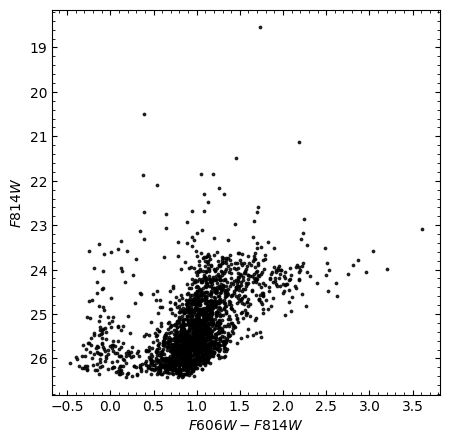

In [107]:
fig, ax = plt.subplots(1,1, figsize=(5,5)) 

ax.scatter(T['F606W_']-T['F814W_'], T['F814W_'], s=3, color='black', alpha=0.8)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel(r'$F606W-F814W$')
ax.set_ylabel(r'$F814W$')
ax.minorticks_on()
ax.tick_params(axis='x', which='both', top=True, direction='in')
ax.tick_params(axis='y', which='both', right=True, direction='in')
